# Modern Portfolio Theory - COVID-19

Modern Portfolio Theory is a theory on how to optimize returns based on a given level of market risk observed using historical data. Modern portfolio theory argues that an investment's risk and return characteristics should not be viewed alone, but should be evaluated by how the investment affects the overall portfolio's risk and return. MPT shows that an investor can construct a portfolio of multiple assets that will maximize returns for a given level of risk. Likewise, given a desired level of expected return, an investor can construct a portfolio with the lowest possible risk.

Given the impact COVID-19 had had on the market starting February 24, 2020, we look to see how optimal portfolios made up of the same assets change given different economic conditions. 
* Pre-COVID Data Frame (pre_df)
* Post COVID Data Frame (post_df)

In [1]:
import pandas as pd
import yfinance as yf
from datetime import date


In [2]:
current_date = date.today()
current_date = current_date.strftime("%Y-%m-%d")
current_date # apply as end date below when extracting stock price data

'2020-06-27'

In [3]:
raw_df = yf.download(["AMZN", "BA", "DIS", "IBM", "KO", "MSFT","TSLA","NFLX","FB","CAT","V","CVX","KAR"], 
                     start = "2019-01-01", end = current_date)

[*********************100%***********************]  13 of 13 completed


In [4]:
raw_df.head()

Adj Close                                                  \
                   AMZN          BA         CAT         CVX         DIS   
Date                                                                      
2019-01-02  1539.130005  314.645142  120.930229  105.139481  107.654343   
2019-01-03  1500.280029  302.100555  116.270241  103.125793  105.046211   
2019-01-04  1575.390015  317.822601  122.623909  105.262962  108.286606   
2019-01-07  1629.510010  318.823395  122.700462  106.630760  109.225136   
2019-01-08  1656.579956  330.891937  124.174049  106.165329  110.074753   

                                                                      ...  \
                    FB         IBM        KAR         KO        MSFT  ...   
Date                                                                  ...   
2019-01-02  135.679993  112.546227  16.564972  45.093166   99.375191  ...   
2019-01-03  131.740005  110.299408  16.178419  44.814518   95.719376  ...   
2019-01-04  137.949997  114.607445  16.635897  45.708115  100.171211  ...   
2019-01-07  138.050003  115.418259  16.511774  45.112381  100.298965  ...   
2019-01-08  142.529999  117.059410  16.650084  45.621643  101.026199  ...   

             Volume                                                            \
                CVX       DIS        FB      IBM      KAR        KO      MSFT   
Date                                                                            
2019-01-02  6384800   9723500  28146200  4239900  4345200  11603700  35329300   
2019-01-03  6496200  10594700  22717900  4346700  2806500  14714400  42579100   
2019-01-04  7952500  10122800  29002100  4477800  3628500  13013700  44060600   
2019-01-07  5712700   6714700  20089300  3751200  2961600  13135500  35656100   
2019-01-08  5674900   8730700  26263800  4763600  4179600  15420700  31514400   

                                          
                NFLX      TSLA         V  
Date                                      
2019-01-02  11679500  11658600   8788000  
2019-01-03  14969600   6965200   9428300  
2019-01-04  19330100   7394100  11065800  
2019-01-07  18620100   7551200  12928000  
2019-01-08  15359200   7008500   9243000  

[5 rows x 78 columns]

Select only adjusted close amounts from extract, which includes gains from dividends 

In [5]:
raw_df = raw_df["Adj Close"].copy()
raw_df.head()

,AMZN,BA,CAT,CVX,DIS,FB,IBM,KAR,KO,MSFT,NFLX,TSLA,V
Date,,,,,,,,,,,,,
2019-01-02,1539.130005,314.645142,120.930229,105.139481,107.654343,135.679993,112.546227,16.564972,45.093166,99.375191,267.660004,310.119995,131.881531
2019-01-03,1500.280029,302.100555,116.270241,103.125793,105.046211,131.740005,110.299408,16.178419,44.814518,95.719376,271.200012,300.359985,127.128967
2019-01-04,1575.390015,317.822601,122.623909,105.262962,108.286606,137.949997,114.607445,16.635897,45.708115,100.171211,297.570007,317.690002,132.605835
2019-01-07,1629.510010,318.823395,122.700462,106.630760,109.225136,138.050003,115.418259,16.511774,45.112381,100.298965,315.339996,334.959991,134.996994
2019-01-08,1656.579956,330.891937,124.174049,106.165329,110.074753,142.529999,117.059410,16.650084,45.621643,101.026199,320.269989,335.350006,135.731247


Calculate the daily percentage change in stock price

In [6]:
ret = raw_df.pct_change().dropna()
ret.head()

,AMZN,BA,CAT,CVX,DIS,FB,IBM,KAR,KO,MSFT,NFLX,TSLA,V
Date,,,,,,,,,,,,,
2019-01-03,-0.025242,-0.039869,-0.038535,-0.019153,-0.024227,-0.029039,-0.019964,-0.023336,-0.006179,-0.036788,0.013226,-0.031472,-0.036037
2019-01-04,0.050064,0.052042,0.054646,0.020724,0.030847,0.047138,0.039058,0.028277,0.019940,0.046509,0.097234,0.057697,0.043081
2019-01-07,0.034353,0.003149,0.000624,0.012994,0.008667,0.000725,0.007075,-0.007461,-0.013033,0.001275,0.059717,0.054361,0.018032
2019-01-08,0.016612,0.037853,0.012010,-0.004365,0.007779,0.032452,0.014219,0.008376,0.011289,0.007251,0.015634,0.001164,0.005439
2019-01-09,0.001714,0.009691,0.003853,0.013420,0.011219,0.011927,0.007177,0.034505,-0.019166,0.014300,-0.000968,0.009483,0.011769


Create a function for creating the annualized return and standard deviation

In [7]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

### Create several random portfolios

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
pd.options.display.float_format = '{:.4f}'.format

In [9]:
noa = len(ret.columns)
noa

13

In [10]:
nop = 100000
nop

100000

Create 10,000 random portfolios

In [11]:
np.random.seed(123)
weight_matrix = np.random.random(noa * nop).reshape(nop, noa)

Normalize the weights of each portfolio so they add up to 1

In [12]:
weights = weight_matrix / weight_matrix.sum(axis = 1, keepdims= True)

### Split data into Pre & Post COVID-19 market drop (2/24/2020)

In [13]:
pre_df = ret.loc[ret.index < '2020-02-24']
print(pre_df.shape)
post_df = ret.loc[ret.index >= '2020-02-24']
print(post_df.shape)

(286, 13)
(50, 13)


# Pre-COVID Market
First start by annualizing the risk (standard deviation) and return (average) for each of the stocks in our portfolio

In [14]:
pre_summary = ann_risk_return(pre_df)
pre_summary.head()

,Return,Risk
AMZN,0.2994,0.2340
BA,0.0841,0.2871
CAT,0.1388,0.2664
CVX,0.0487,0.1837
DIS,0.2495,0.2235


Calculate the weighted average return for each portfolio and each date using our randomly assigned weights

In [15]:
pre_port_ret = pre_df.dot(weights.T)
pre_port_ret.head()

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.0238,-0.0235,-0.0247,-0.0226,-0.0240,-0.0209,-0.0247,-0.0227,-0.0280,-0.0220,...,-0.0250,-0.0251,-0.0223,-0.0230,-0.0261,-0.0267,-0.0185,-0.0237,-0.0275,-0.0226
2019-01-04,0.0425,0.0467,0.0452,0.0442,0.0461,0.0449,0.0413,0.0471,0.0454,0.0429,...,0.0498,0.0435,0.0479,0.0463,0.0423,0.0446,0.0462,0.0496,0.0446,0.0460
2019-01-07,0.0148,0.0121,0.0181,0.0108,0.0149,0.0134,0.0110,0.0159,0.0130,0.0138,...,0.0148,0.0171,0.0133,0.0146,0.0108,0.0133,0.0180,0.0163,0.0161,0.0128
2019-01-08,0.0113,0.0127,0.0101,0.0151,0.0133,0.0139,0.0126,0.0123,0.0121,0.0092,...,0.0133,0.0102,0.0157,0.0144,0.0159,0.0112,0.0091,0.0146,0.0110,0.0130
2019-01-09,0.0092,0.0073,0.0091,0.0066,0.0078,0.0072,0.0109,0.0066,0.0098,0.0074,...,0.0075,0.0118,0.0086,0.0087,0.0062,0.0078,0.0044,0.0062,0.0080,0.0078


Annualize the risk and return for each portfolio

In [16]:
pre_port_summary = ann_risk_return(pre_port_ret)
pre_port_summary.head()

,Return,Risk
0,0.3709,0.1517
1,0.3918,0.1597
2,0.4180,0.1671
3,0.3259,0.1420
4,0.3773,0.1533


### Compare risk and return of our 1,000 randomly weighted portfolios and each stock individually 

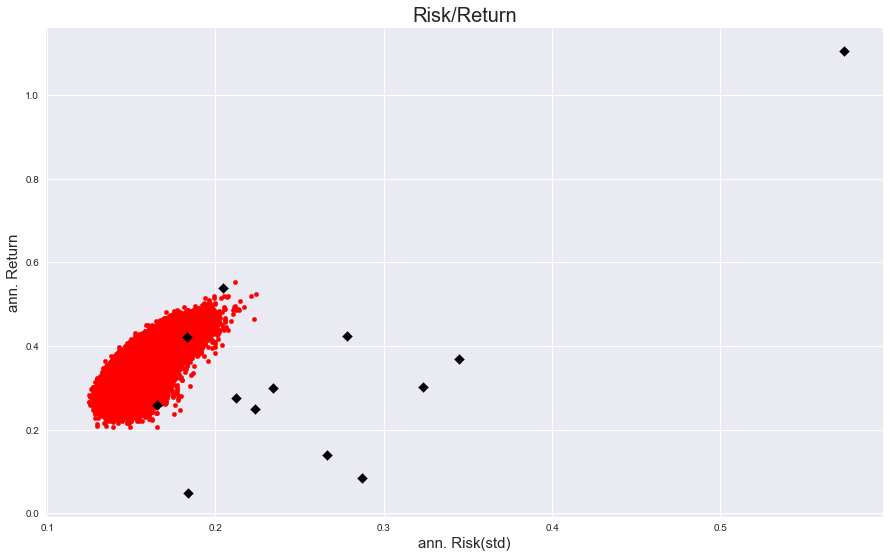

In [17]:
plt.figure(figsize = (15, 9))
plt.scatter(pre_port_summary.loc[:, "Risk"], pre_port_summary.loc[:, "Return"],s= 20, color = "red")
plt.scatter(pre_summary.loc[:, "Risk"], pre_summary.loc[:, "Return"], s= 50, color = "black", marker = "D")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

### Sharpe Ratio

Subtracting the risk-free rate from the mean return allows an investor to better isolate the profits associated with risk-taking activities. Generally, the greater the value of the Sharpe ratio, the more attractive the risk-adjusted return.
\begin{equation}
    SharpeRatio = \frac{PortReturn - RFR}{PortRisk}
\end{equation}

In [18]:
risk_free_return = 0.017
risk_free_risk = 0

In [19]:
rf = [risk_free_return, risk_free_risk]
rf

[0.017, 0]

 Calculate the sharpe ratio for each one of our stocks, and then also for each one of our portfolios

In [20]:
pre_summary["Sharpe"] = (pre_summary["Return"].sub(rf[0]))/pre_summary["Risk"]
pre_summary

,Return,Risk,Sharpe
AMZN,0.2994,0.2340,1.2068
BA,0.0841,0.2871,0.2339
CAT,0.1388,0.2664,0.4572
CVX,0.0487,0.1837,0.1725
DIS,0.2495,0.2235,1.0400
FB,0.4242,0.2779,1.4653
IBM,0.2746,0.2121,1.2145
KAR,0.3027,0.3232,0.8842
KO,0.2597,0.1654,1.4678
MSFT,0.5378,0.2043,2.5491


In [21]:
pre_port_summary["Sharpe"] = (pre_port_summary["Return"].sub(rf[0]))/pre_port_summary["Risk"]
pre_port_summary.head()

,Return,Risk,Sharpe
0,0.3709,0.1517,2.3323
1,0.3918,0.1597,2.3474
2,0.4180,0.1671,2.3993
3,0.3259,0.1420,2.1751
4,0.3773,0.1533,2.3507


Identify the pre-COVID-19 portfolio with the optimal balance of risk and return by selecting the portfolio with the max sharpe ratio across our 1,000 randomly weighted portfolios

In [22]:
pre_port_summary.describe()

,Return,Risk,Sharpe
count,100000.0000,100000.0000,100000.0000
mean,0.3471,0.1555,2.1188
std,0.0426,0.0107,0.1937
min,0.2053,0.1247,1.1466
25%,0.3158,0.1478,1.9942
50%,0.3470,0.1546,2.1360
75%,0.3774,0.1621,2.2573
max,0.5518,0.2243,2.7273


In [23]:
pre_summary.describe()

,Return,Risk,Sharpe
count,13.0000,13.0000,13.0000
mean,0.3472,0.2676,1.2167
std,0.2661,0.1071,0.7167
min,0.0487,0.1654,0.1725
25%,0.2495,0.2043,0.8842
50%,0.2994,0.2340,1.2068
75%,0.4220,0.2871,1.4678
max,1.1042,0.5733,2.5491


Plot the Sharpe Ratio for each one of our 10,000 randomly weighted portfolios along with each of the individual stocks that make up our portfolios

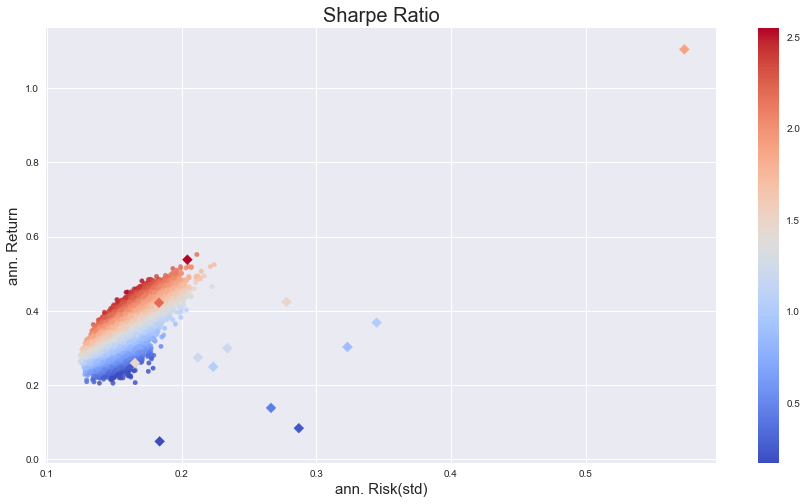

In [24]:
plt.figure(figsize = (15, 8))
plt.scatter(pre_port_summary.loc[:, "Risk"], pre_port_summary.loc[:, "Return"], s= 20, 
            c = pre_port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 1.38, vmax = 2.72, alpha = 0.8)
plt.scatter(pre_summary.loc[:, "Risk"], pre_summary.loc[:, "Return"],s= 50, marker = "D",
            c = pre_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.1725, vmax = 2.55,)
plt.colorbar()
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

### Identify the max weightings associated with the max sharpe ratio

In [25]:
msrp_pre = pre_port_summary.Sharpe.idxmax()
msrp_pre_p = pre_port_summary.iloc[msrp_pre]
msrp_pre_w = weights[msrp_pre, :]
msrp_pre_w

array([0.01591975, 0.01136972, 0.01111481, 0.00301418, 0.10085304,
       0.09176262, 0.12875938, 0.09677594, 0.13268711, 0.13597422,
       0.02175831, 0.13599014, 0.11402078])

In [26]:
pre_opt_weights = pd.Series(index = pre_df.columns, data = msrp_pre_w)
pre_opt_weights

AMZN   0.0159
BA     0.0114
CAT    0.0111
CVX    0.0030
DIS    0.1009
FB     0.0918
IBM    0.1288
KAR    0.0968
KO     0.1327
MSFT   0.1360
NFLX   0.0218
TSLA   0.1360
V      0.1140
dtype: float64

Calculate the daily return of our optimized portfolio

In [27]:
pre_df["MP"] = pre_df.dot(pre_opt_weights)
pre_df.head()

/Users/carsonransford/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,AMZN,BA,CAT,CVX,DIS,FB,IBM,KAR,KO,MSFT,NFLX,TSLA,V,MP
Date,,,,,,,,,,,,,,
2019-01-03,-0.0252,-0.0399,-0.0385,-0.0192,-0.0242,-0.0290,-0.0200,-0.0233,-0.0062,-0.0368,0.0132,-0.0315,-0.0360,-0.0252
2019-01-04,0.0501,0.0520,0.0546,0.0207,0.0308,0.0471,0.0391,0.0283,0.0199,0.0465,0.0972,0.0577,0.0431,0.0411
2019-01-07,0.0344,0.0031,0.0006,0.0130,0.0087,0.0007,0.0071,-0.0075,-0.0130,0.0013,0.0597,0.0544,0.0180,0.0110
2019-01-08,0.0166,0.0379,0.0120,-0.0044,0.0078,0.0325,0.0142,0.0084,0.0113,0.0073,0.0156,0.0012,0.0054,0.0108
2019-01-09,0.0017,0.0097,0.0039,0.0134,0.0112,0.0119,0.0072,0.0345,-0.0192,0.0143,-0.0010,0.0095,0.0118,0.0087


In [28]:
pre_summary = ann_risk_return(pre_df)

Here we can show that our optimized portfolio has a noticeably greater Sharpe Ratio when compared to any one of our individual stocks that make up our portfolio

In [29]:
pre_summary["Sharpe"] = (pre_summary["Return"].sub(rf[0]))/pre_summary["Risk"]
pre_summary.head(20)

,Return,Risk,Sharpe
AMZN,0.2994,0.2340,1.2068
BA,0.0841,0.2871,0.2339
CAT,0.1388,0.2664,0.4572
CVX,0.0487,0.1837,0.1725
DIS,0.2495,0.2235,1.0400
FB,0.4242,0.2779,1.4653
IBM,0.2746,0.2121,1.2145
KAR,0.3027,0.3232,0.8842
KO,0.2597,0.1654,1.4678
MSFT,0.5378,0.2043,2.5491


Visualize the risk and return of our optimized portfolio and our other 9,999 randomly weighted portfolios. We also show the Capital Market Line, which represents portfolios that optimally combine risk and return.

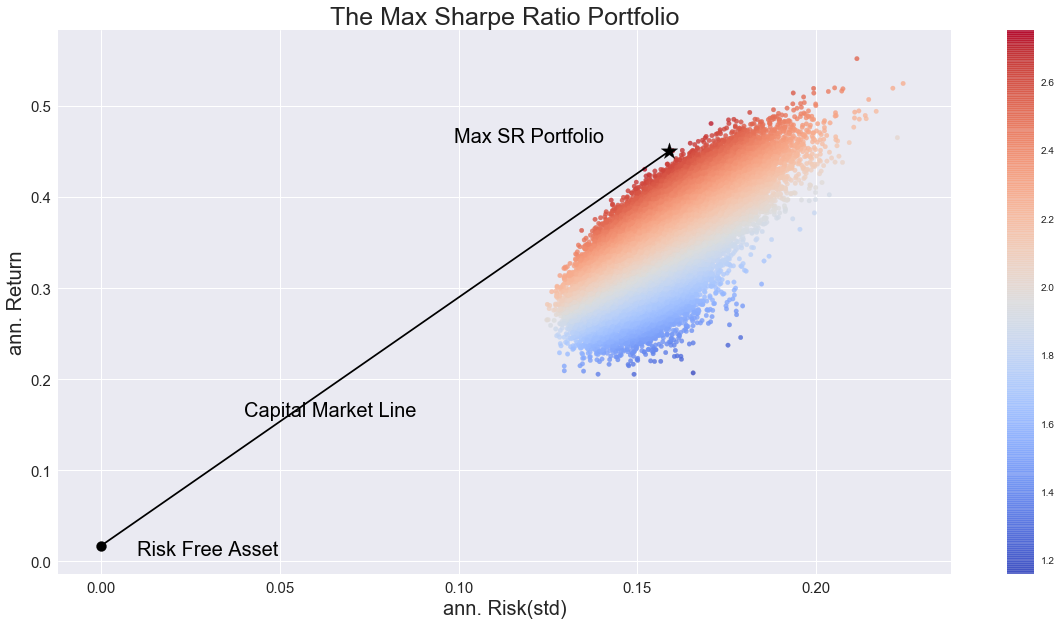

In [30]:
plt.figure(figsize = (20, 10))
plt.scatter(pre_port_summary.loc[:, "Risk"], pre_port_summary.loc[:, "Return"], s= 20, c = pre_port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 1.159, vmax = 2.75, alpha = 0.8)
plt.colorbar()
plt.scatter(pre_summary.loc["MP", "Risk"], pre_summary.loc["MP", "Return"],s= 300, c = "black", marker = "*")
plt.annotate("Max SR Portfolio", xy=(pre_summary.loc["MP", "Risk"]-0.06, pre_summary.loc["MP", "Return"]+0.01), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 20)
plt.ylabel("ann. Return", fontsize = 20)
plt.tick_params(axis = "both", labelsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 25)
plt.plot([rf[1],pre_summary.loc["MP", "Risk"]], [rf[0],pre_summary.loc["MP", "Return"]], c = "black")
plt.annotate("Capital Market Line", xy = (0.04, 0.16), size = 20, color = "black")
plt.show()

### Show Systematic vs Unsystematic Risk
Through the use of our optimized portfolio we can show the amount of risk avoided (Unsystematic Risk) when compared to the inherent risk in the market that we were not able to avoid (Systematic Risk)

In [31]:
pre_summary["TotalRisk_var"] = np.power(pre_summary.Risk, 2)

In [32]:
COV = pre_df.cov()*252

Calculate the systematic risk, which is the risk that could not be avoided even with our optimized portfolio. We calculate this for each stock by subtracting the portfolio risk from the risk of each stock.

In [33]:
pre_summary["SystRisk_var"] = COV.iloc[:, -1]

In [34]:
pre_summary["UnsystRisk_var"] = pre_summary["TotalRisk_var"].sub(pre_summary["SystRisk_var"])

Visualize the risk we were able to avoid as the result of our optimized portfolio (Unsystematic), against the market risk we were not able to avoid (Systematic).

When doing so we can see that Kar, Tesla, and Netflix had the greatest amount of risk avoided as a result of using the optimized portfolio.

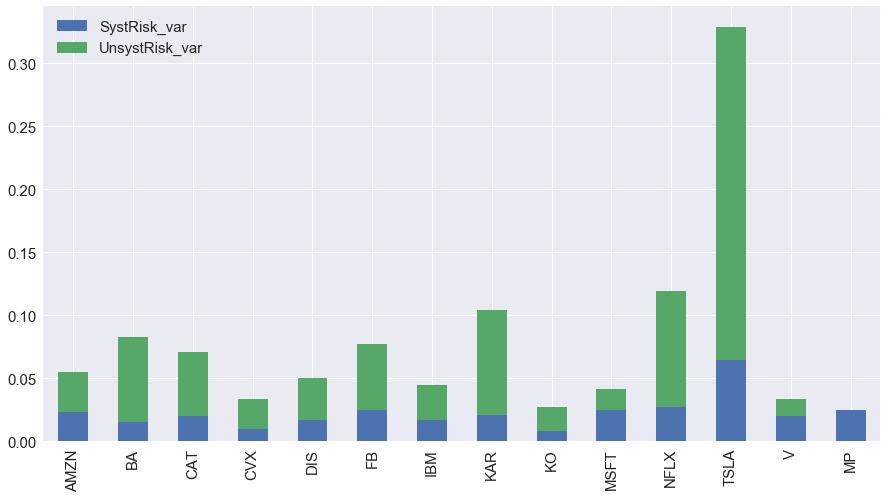

In [35]:
pre_summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

We can also look at which of our stocks had the greatest representation in our optimized portfolio

In [36]:
print(pre_opt_weights)

AMZN   0.0159
BA     0.0114
CAT    0.0111
CVX    0.0030
DIS    0.1009
FB     0.0918
IBM    0.1288
KAR    0.0968
KO     0.1327
MSFT   0.1360
NFLX   0.0218
TSLA   0.1360
V      0.1140
dtype: float64


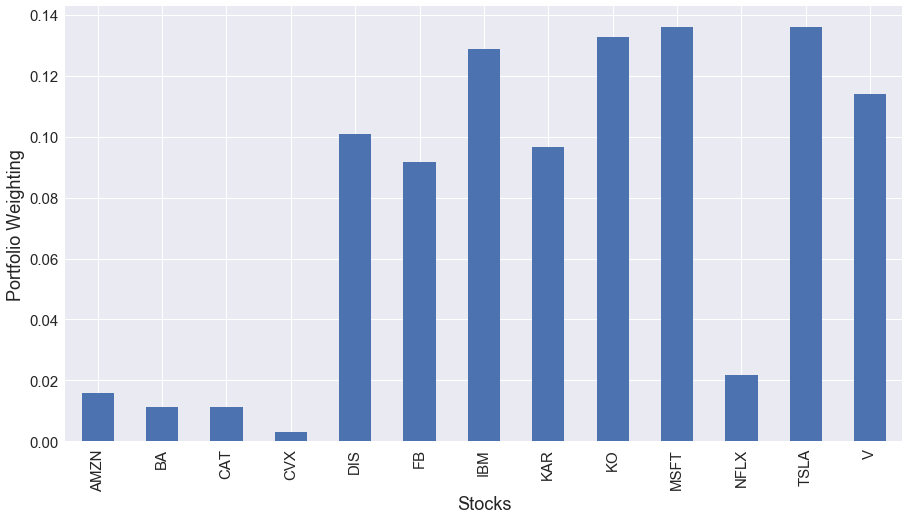

In [37]:
ax_pre_wt = pre_opt_weights.plot(kind = "bar", figsize= (15, 8), fontsize = 15)
ax_pre_wt.set_xlabel("Stocks", fontsize=18)
ax_pre_wt.set_ylabel("Portfolio Weighting", fontsize=18)
plt.show()

Take another look at the annualized risk and return of our Market Portfolio (MP), and each of the different types of stocks that make up the portfolio

In [38]:
pre_summary.head(20)

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AMZN,0.2994,0.2340,1.2068,0.0548,0.0229,0.0318
BA,0.0841,0.2871,0.2339,0.0824,0.0152,0.0672
CAT,0.1388,0.2664,0.4572,0.0710,0.0198,0.0512
CVX,0.0487,0.1837,0.1725,0.0337,0.0100,0.0237
DIS,0.2495,0.2235,1.0400,0.0500,0.0171,0.0329
FB,0.4242,0.2779,1.4653,0.0772,0.0247,0.0525
IBM,0.2746,0.2121,1.2145,0.0450,0.0170,0.0280
KAR,0.3027,0.3232,0.8842,0.1044,0.0212,0.0833
KO,0.2597,0.1654,1.4678,0.0273,0.0085,0.0188
MSFT,0.5378,0.2043,2.5491,0.0417,0.0252,0.0165


# Post COVID-19 Data Set

In [39]:
post_summary = ann_risk_return(post_df)

In [40]:
post_port_ret = post_df.dot(weights.T)

In [41]:
post_port_summary = ann_risk_return(post_port_ret)

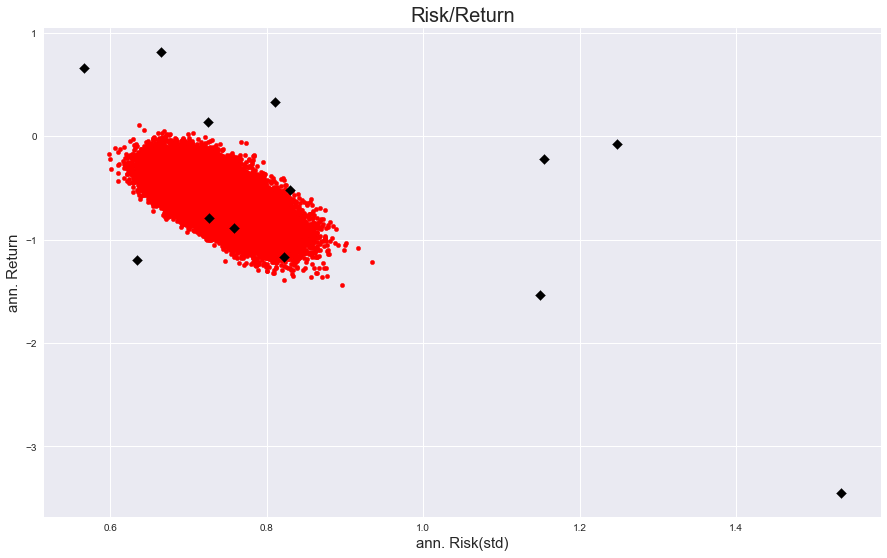

In [42]:
plt.figure(figsize = (15, 9))
plt.scatter(post_port_summary.loc[:, "Risk"], post_port_summary.loc[:, "Return"],s= 20, color = "red")
plt.scatter(post_summary.loc[:, "Risk"], post_summary.loc[:, "Return"], s= 50, color = "black", marker = "D")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [43]:
post_summary["Sharpe"] = (post_summary["Return"].sub(rf[0]))/post_summary["Risk"]

In [44]:
post_port_summary["Sharpe"] = (post_port_summary["Return"].sub(rf[0]))/post_port_summary["Risk"]

In [45]:
msrp_post = post_port_summary.Sharpe.idxmax()
msrp_post_p = post_port_summary.iloc[msrp_post]
msrp_post_w = weights[msrp_post, :]

In [46]:
post_opt_weights = pd.Series(index = post_df.columns, data = msrp_post_w)

In [47]:
post_df["MP"] = post_df.dot(post_opt_weights)

/Users/carsonransford/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
post_summary = ann_risk_return(post_df)

In [49]:
post_summary["Sharpe"] = (post_summary["Return"].sub(rf[0]))/post_summary["Risk"]
post_summary.head(20)

,Return,Risk,Sharpe
AMZN,0.6610,0.5658,1.1381
BA,-3.4478,1.5341,-2.2585
CAT,-0.8848,0.7580,-1.1897
CVX,-0.2163,1.1540,-0.2022
DIS,-1.1658,0.8222,-1.4385
FB,0.1413,0.7250,0.1715
IBM,-0.7878,0.7258,-1.1089
KAR,-1.5368,1.1498,-1.3514
KO,-1.1981,0.6348,-1.9141
MSFT,0.3296,0.8106,0.3856


In [50]:
post_summary["TotalRisk_var"] = np.power(post_summary.Risk, 2)

In [51]:
COV = post_df.cov()*252

In [52]:
post_summary["SystRisk_var"] = COV.iloc[:, -1]

In [53]:
post_summary["UnsystRisk_var"] = post_summary["TotalRisk_var"].sub(post_summary["SystRisk_var"])

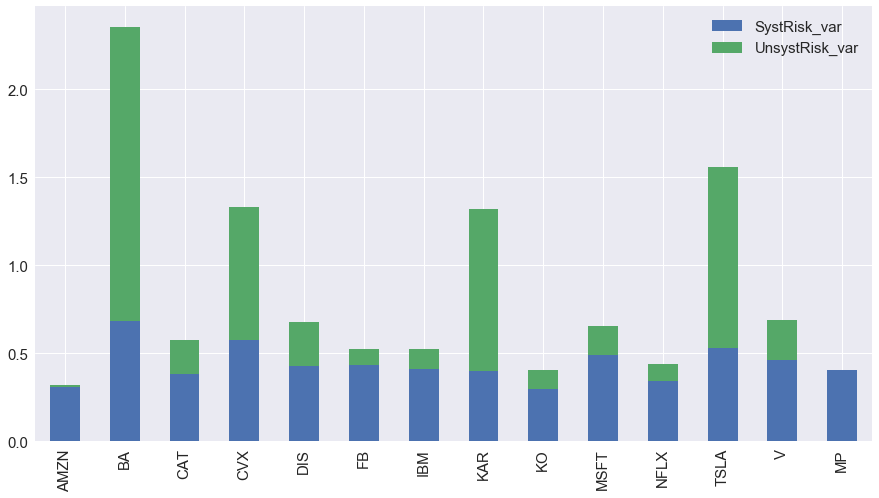

In [54]:
post_summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [55]:
print(post_opt_weights)

AMZN   0.2030
BA     0.0239
CAT    0.0314
CVX    0.0969
DIS    0.0227
FB     0.2154
IBM    0.0438
KAR    0.0179
KO     0.0093
MSFT   0.0362
NFLX   0.2380
TSLA   0.0114
V      0.0501
dtype: float64


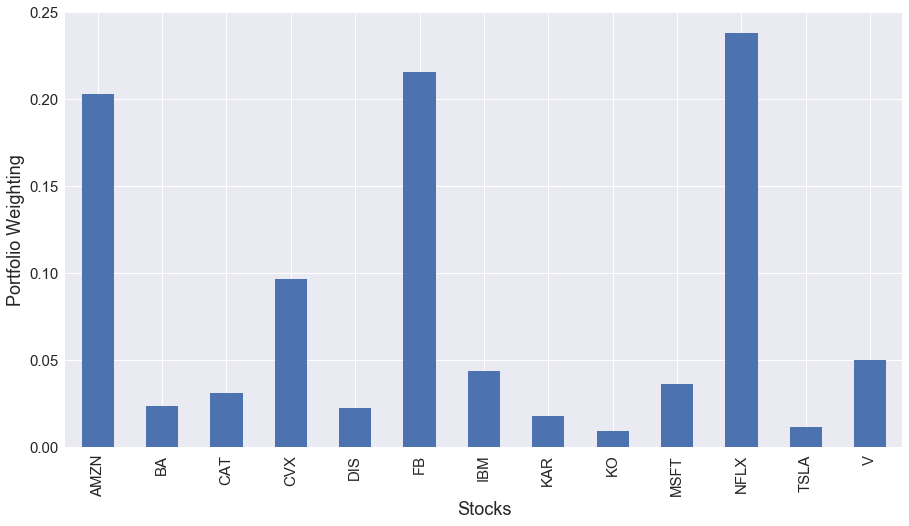

In [56]:
ax_post_wt = post_opt_weights.plot(kind = "bar", figsize= (15, 8), fontsize = 15)
ax_post_wt.set_xlabel("Stocks", fontsize=18)
ax_post_wt.set_ylabel("Portfolio Weighting", fontsize=18)
plt.show()

In [57]:
post_summary.head(20)

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AMZN,0.6610,0.5658,1.1381,0.3202,0.3091,0.0110
BA,-3.4478,1.5341,-2.2585,2.3536,0.6809,1.6727
CAT,-0.8848,0.7580,-1.1897,0.5746,0.3797,0.1949
CVX,-0.2163,1.1540,-0.2022,1.3317,0.5743,0.7574
DIS,-1.1658,0.8222,-1.4385,0.6761,0.4286,0.2475
FB,0.1413,0.7250,0.1715,0.5256,0.4313,0.0943
IBM,-0.7878,0.7258,-1.1089,0.5267,0.4085,0.1182
KAR,-1.5368,1.1498,-1.3514,1.3220,0.4006,0.9214
KO,-1.1981,0.6348,-1.9141,0.4030,0.2979,0.1050
MSFT,0.3296,0.8106,0.3856,0.6571,0.4901,0.1670


# Compare Pre and Post COVID-19 Portfolio Trends

### Sharpe Ratio
Given the more consistent conditions of the market prior to the COVID collapse on February 24th, we can see that our optimized portfolio reaches an annualized return of 45% with an annualized risk of 0.1588, producing a Sharpe Ratio of 2.7273. We can also see how each of our individual stocks results in a positive Sharpe ratio. 

However, when re-running the same process on the market from February 24th forward we can see that around half of our same selection of stocks result in a negative Sharpe Ratio, indicating the returns are not worth the risk. For our optimized portfolio we can see that our annualized returns have now dropped to just over 11%, with an annualized risk of 0.6365, up from 0.1588 in our pre-COVID environment. 

In [58]:
pre_summary.head(20)

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AMZN,0.2994,0.2340,1.2068,0.0548,0.0229,0.0318
BA,0.0841,0.2871,0.2339,0.0824,0.0152,0.0672
CAT,0.1388,0.2664,0.4572,0.0710,0.0198,0.0512
CVX,0.0487,0.1837,0.1725,0.0337,0.0100,0.0237
DIS,0.2495,0.2235,1.0400,0.0500,0.0171,0.0329
FB,0.4242,0.2779,1.4653,0.0772,0.0247,0.0525
IBM,0.2746,0.2121,1.2145,0.0450,0.0170,0.0280
KAR,0.3027,0.3232,0.8842,0.1044,0.0212,0.0833
KO,0.2597,0.1654,1.4678,0.0273,0.0085,0.0188
MSFT,0.5378,0.2043,2.5491,0.0417,0.0252,0.0165


In [59]:
post_summary.head(20)

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AMZN,0.6610,0.5658,1.1381,0.3202,0.3091,0.0110
BA,-3.4478,1.5341,-2.2585,2.3536,0.6809,1.6727
CAT,-0.8848,0.7580,-1.1897,0.5746,0.3797,0.1949
CVX,-0.2163,1.1540,-0.2022,1.3317,0.5743,0.7574
DIS,-1.1658,0.8222,-1.4385,0.6761,0.4286,0.2475
FB,0.1413,0.7250,0.1715,0.5256,0.4313,0.0943
IBM,-0.7878,0.7258,-1.1089,0.5267,0.4085,0.1182
KAR,-1.5368,1.1498,-1.3514,1.3220,0.4006,0.9214
KO,-1.1981,0.6348,-1.9141,0.4030,0.2979,0.1050
MSFT,0.3296,0.8106,0.3856,0.6571,0.4901,0.1670


Stcosk such as Tesla, Netflix, and Kar Auto Auction appeared to have the greatest benefit in reducing risk through the use of our optimized portfolio, this narrative changes once we look at the post-COVID environment. With the sharp reduction in travel companies in the transportation, oil & gas, and auto manufacturing and resale were often impacted the most. We can see that as in our post-COVID environment stocks such as Boeing, Chevron, Kar Auto Auction, and Tesla benefited the most in terms of reducing risk through the use of our optimized portfolio. 

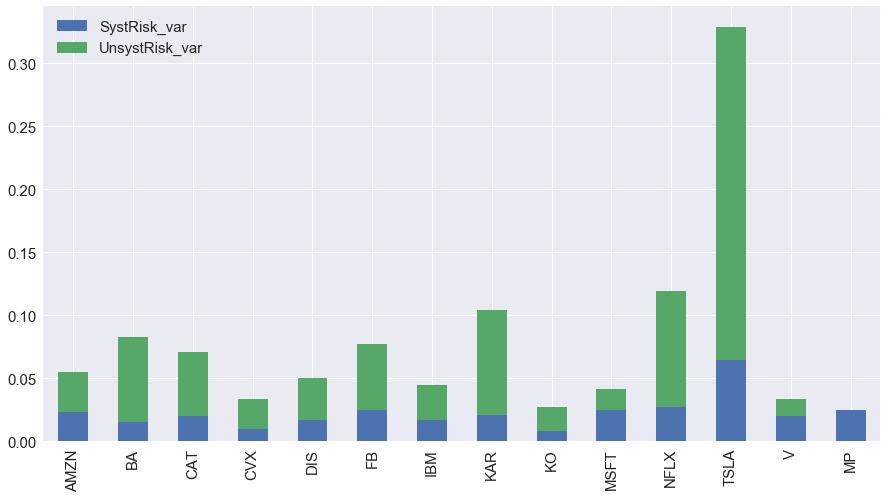

In [60]:
pre_summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

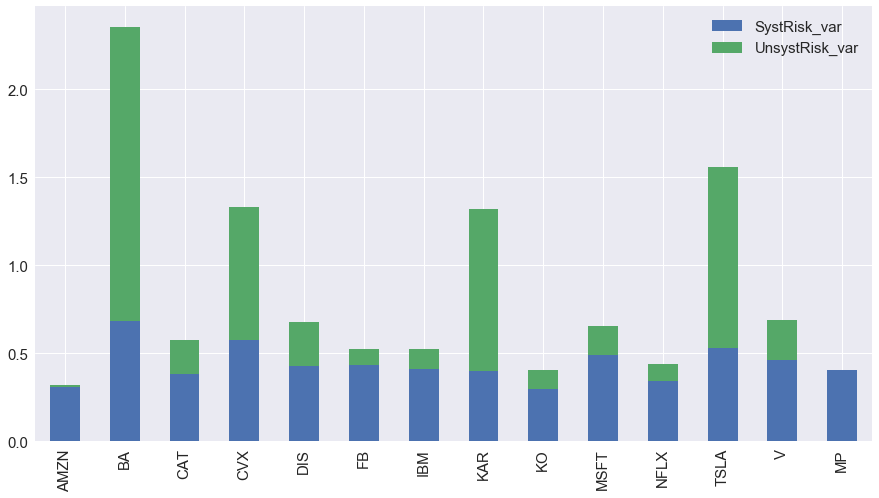

In [61]:
post_summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

While it may seem like that the each stocks weighting within the portfolio should have a linear relationship to the Sharpe Ratio for each relationship, that is not exactly accurate. The Modern Portfolio Theory actually takes the entire portfolio of stocks into consideration to help find the optimal balance of risk reduction and returns. 

So while two stocks may produce a high Sharpe Ratio, they may also have a high positive covariance, indicating that the stocks often react to the market in a similar manner. Weighting both of these stocks heavily with in our portfolio will actually increase risk as we should be looking for stocks that help offset the risk of one another, which is often referred to as the Diversification Effect. An example of this has been created further below.

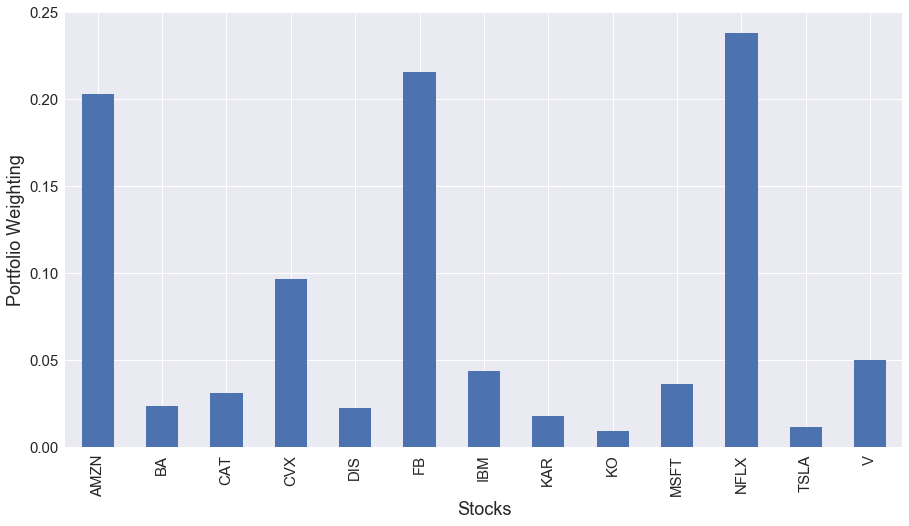

In [62]:
ax_post_wt = post_opt_weights.plot(kind = "bar", figsize= (15, 8), fontsize = 15)
ax_post_wt.set_xlabel("Stocks", fontsize=18)
ax_post_wt.set_ylabel("Portfolio Weighting", fontsize=18)
plt.show()

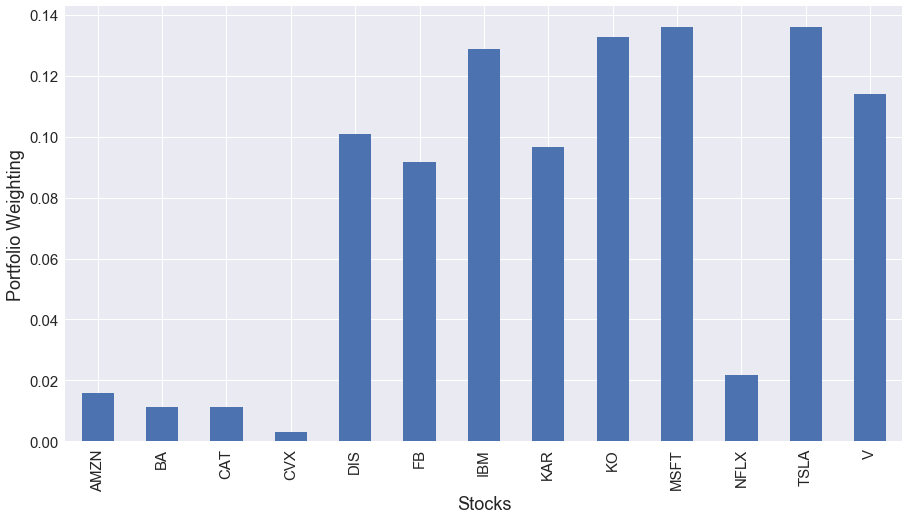

In [63]:
ax_pre_wt = pre_opt_weights.plot(kind = "bar", figsize= (15, 8), fontsize = 15)
ax_pre_wt.set_xlabel("Stocks", fontsize=18)
ax_pre_wt.set_ylabel("Portfolio Weighting", fontsize=18)
plt.show()

### Diversification Effect
Here we demonstrate how the appropriate selection of stocks can help reduce the risk of our overall portfolio by identifying those that react differently to the market.

In [64]:
three_stocks = pd.DataFrame(data = {"A": [0.05, 0.1, -0.02, 0.04, 0.06, -0.04, 0.03, 0.15, 0.06, 0.02], 
                                  "B": [0.05, 0.0, 0.12, 0.06, 0.04, 0.14, 0.07, -0.05, 0.04, 0.08], 
                                  "C": [0.1, 0.2, -0.04, 0.08, 0.12, -0.08, 0.06, 0.3, 0.12, 0.04]},
            index = range(1, 11))
three_stocks

,A,B,C
1,0.0500,0.0500,0.1000
2,0.1000,0.0000,0.2000
3,-0.0200,0.1200,-0.0400
4,0.0400,0.0600,0.0800
5,0.0600,0.0400,0.1200
6,-0.0400,0.1400,-0.0800
7,0.0300,0.0700,0.0600
8,0.1500,-0.0500,0.3000
9,0.0600,0.0400,0.1200
10,0.0200,0.0800,0.0400


Here we can see how stocks A and B have a strong negative correlation, indicating that when one stock increases the other typically decreases.

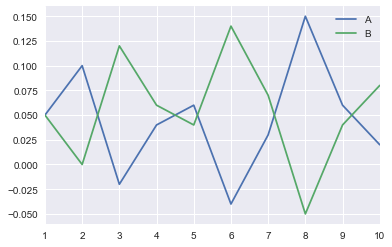

In [65]:
three_stocks.loc[:, ["A", "B"]].plot()
plt.show()

In [66]:
three_stocks["AB"] = three_stocks[["A", "B"]].mean(axis = 1)

In [67]:
three_stocks["AC"] = three_stocks[["A", "C"]].mean(axis = 1)

By diversifying with stocks A & B, which have a perfectly negative correlation, we can create a perfectly consistent return of 5%

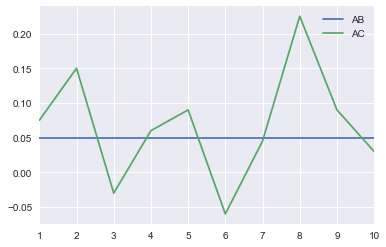

In [68]:
three_stocks.loc[:, ["AB", "AC"]].plot()
plt.show()

In [123]:
my_vars = []
for var in dir():
    if not var.startswith('_'):
        my_vars.append(var)
        
for x in my_vars:
    del globals()[x]